<a href="https://colab.research.google.com/github/Satyake/Time-Series-Analysis-spagheti-code/blob/master/VARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#VARMA (p,q)

In [1]:
import pandas as pd

In [3]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 6.8MB/s 
     |████████████████████████████████| 2.1MB 29.4MB/s 
     |████████████████████████████████| 8.7MB 34.6MB/s 
     |████████████████████████████████| 808kB 46.0MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2


In [20]:
from statsmodels.tsa.statespace.varmax import VARMAX,VARMAXResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from pmdarima import  auto_arima

In [21]:
df=pd.read_csv('/content/M2SLMoneyStock.csv',index_col=0,parse_dates=True)
sp=pd.read_csv('/content/PCEPersonalSpending.csv',index_col=0,parse_dates=True)

In [22]:
df=df.join(sp)

In [7]:
auto_arima(df['Money'],maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -1176.729
Date:                Mon, 16 Nov 2020   AIC                           2359.458
Time:                        22:11:25   BIC                           2370.023
Sample:                             0   HQIC                          2363.710
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.042      5.297      0.000       0.140       0.305
ma.L1         -0.9481      0.021    -45.132      0.000      -0.989      -0.907
sigma2       712.5495     33.501     21.270      0.000     646.889     778.210
===================================================================================
Ljung-Box (Q):                       80.87   Jarque-Bera (JB):               598.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.31   Skew:                             1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
auto_arima(sp['Spending'],maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1238.601
Date:                Mon, 16 Nov 2020   AIC                           2487.202
Time:                        22:11:48   BIC                           2504.829
Sample:                             0   HQIC                          2494.295
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7221      3.525      1.907      0.057      -0.187      13.631
ar.L1          0.7774      0.120      6.469      0.000       0.542       1.013
ma.L1         -0.7889      0.117     -6.767      0.000      -1.017      -0.560
ma.L2          0.1342      0.062      2.171      0.030       0.013       0.255
sigma2      1131.1359     61.857     18.286      0.000    1009.898    1252.373
===================================================================================
Ljung-Box (Q):                       34.25   Jarque-Bera (JB):               216.24
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.30
Prob(H) (two-sided):                  0.92   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
df_transformed=df.diff().diff()
df_transformed=df_transformed.dropna()
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [24]:
len(df_transformed)

250

In [25]:
nobs=12
train,test=df_transformed[0:-nobs],df_transformed[-nobs:]

In [15]:
a=[1,2,3,4,5,6,7,8,9]
a[-8:]

[2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
model=VARMAX(train,order=(1,2))
results=model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2291.785
,+ intercept,AIC,4617.570
Date:,"Mon, 16 Nov 2020",BIC,4676.598
Time:,23:14:08,HQIC,4641.359
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (Q):,"71.60, 30.32",Jarque-Bera (JB):,"663.32, 128.32"
Prob(Q):,"0.00, 0.87",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"6.15, 2.58",Skew:,"1.43, -0.30"


In [ ]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money'].cumsum()

In [32]:
predictions=results.forecast(12)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


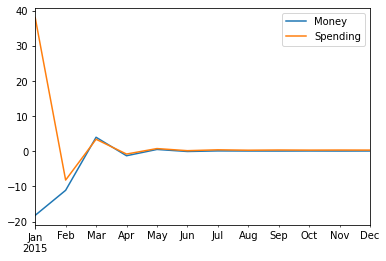

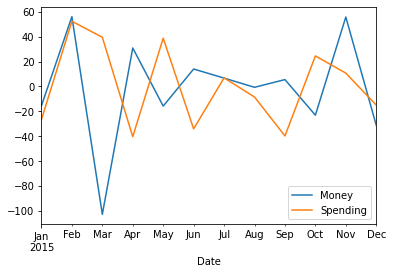

In [34]:
predictions.plot()
test.plot()

In [17]:
train.head()

,Money
Date,
1995-03-01,3.7
1995-04-01,6.9
1995-05-01,16.9
1995-06-01,-0.3
1995-07-01,-6.2
